<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/main/GINI_Impurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gini Impurity**
A measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree.

# Contents Index
**What is Gini Impurity?**
--> Mathematical definition

**Python Example**
-->Visualizing Gini Impurity range
-->Computation of Gini Impurity for a simple dataset


**What is Gini Impurity?**

Gini Impurity is a measurement used to build Decision Trees to determine how the features of a dataset should split nodes to form the tree. More precisely, the Gini Impurity of a dataset is a number between 0-0.5, which indicates the likelihood of new, random data being misclassified if it were given a random class label according to the class distribution in the dataset.

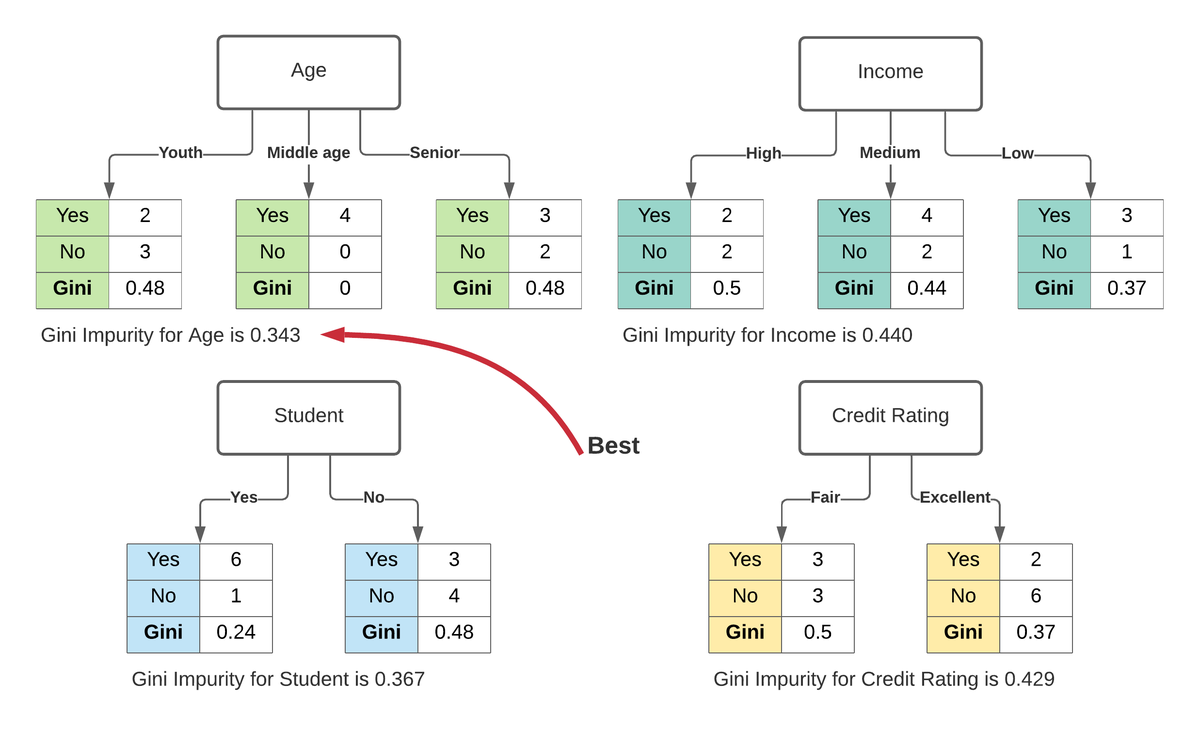
For example, say you want to build a classifier that determines if someone will default on their credit card. You have some labeled data with features, such as bins for age, income, credit rating, and whether or not each person is a student. To find the best feature for the first split of the tree – the root node – you could calculate how poorly each feature divided the data into the correct class, default ("yes") or didn't default ("no"). This calculation would measure the impurity of the split, and the feature with the lowest impurity would determine the best feature for splitting the current node. This process would continue for each subsequent node using the remaining features.

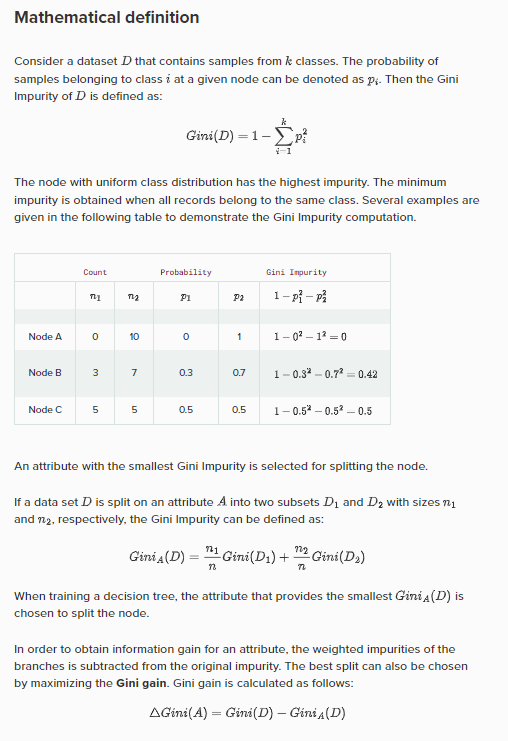


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

##Visualizing Gini Impurity range
For a two class problem, Graph of impurity measures as a function of probability of the first class.

In [ ]:
#A figure is created to show Gini ımpurity measures
plt.figure()
x = np.linspace(0.01,1)
y = 1 - (x*x) - (1-x)*(1-x)
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()

This figure shows that Gini impurity is maximum for the 50-50 sample (p1 = 0.5
 ) and minimum for the homogeneous sample (p1 = 0 or p1 = 1 )

**Computation of Gini Impurity for a simple dataset**

This data set is used to predict whether a person will default on their credit card. There are two classes ( default = 'yes', no_default = 'no' ):

In [ ]:
# Defining a simple dataset
attribute_names =  ['age', 'income','student', 'credit_rate']
class_name = 'default'
data1 ={
    'age' : ['youth', 'youth', 'middle_age', 'senior', 'senior', 'senior','middle_age', 'youth', 'youth', 'senior', 'youth', 'middle_age','middle_age', 'senior'],
    'income' : ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium','low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit_rate' : ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair','excellent', 'excellent', 'fair', 'excellent'],
    'default' : ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes','yes', 'yes', 'yes', 'no']
}
df1 = pd.DataFrame (data1, columns=data1.keys())
print(df1)

In [ ]:
# STEP 1: Calculate gini(D)
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n )
    gini = 1 - p_sum
    return gini

class_value_counts = df1[class_name].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')

In [ ]:
# STEP 2:
# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = df1[attribute_name].value_counts()
    gini_A = 0
    for key in attribute_values.keys():
        df_k = df1[class_name][df1[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = df1.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A

gini_attiribute ={}
for key in attribute_names:
    gini_attiribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attiribute[key]:.3f}')

In [ ]:
# STEP 3:
# Compute Gini gain values to find the best split
# An attribute has maximum Gini gain is selected for splitting.

min_value = min(gini_attiribute.values())
print('The minimum value of Gini Impurity : {0:.3} '.format(min_value))
print('The maximum value of Gini Gain     : {0:.3} '.format(1-min_value))

selected_attribute = min(gini_attiribute.keys())
print('The selected attiribute is: ', selected_attribute)

The figure at the top of this page corresponds to this example.